# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 3.5MB/s 


In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
downloaded = drive.CreateFile({'id':'1hfC8UNsUYP9kaV0649ia8Wt-PcYz1lMO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('resources.csv')


downloaded = drive.CreateFile({'id':'1GNlumJi7f_eP0pcGWjaDaYeLPWMs5gj1'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train_data.csv')

downloaded = drive.CreateFile({'id':'1n6Rlh7nEpEnqGCj0wssp6iwAuwoROY_Z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('glove_vectors(1).csv')

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1  
4                                             1                    1

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [7]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge four column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [01:58<00:00, 918.62it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

In [20]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   
3           GA 2016-04-27 00:53:00          Grades PreK-2   
4           WA 2016-04-27 01:05:25             Grades 3-5   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   
2  I have a class of twenty-four kindergarten stu...   
3  I teach at a low-income (Title 1) school. Ever...   
4  We are an urban, public k-5 elementary school....   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   
2  By having a mobile listening and storage cente...   
3  We need a classroom rug that we can use as a c...   
4  With the new common core standards that have b...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   
2  A mobile listening center will help keep equip...   
3  Benjamin Franklin once said, \"Tell me and I f...   
4  These remarkable gifts will provide students w...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   
3  My students need flexible seating in the class...   
4  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   
2                                            10                    1  329.00   
3                                             2                    1  481.04   
4                                             2                    1   17.74   

   quantity   clean_categories                 clean_subcategories  \
0         4       Math_Science  AppliedSciences Health_LifeScience   
1         8       SpecialNeeds                        SpecialNeeds   
2         1  Literacy_Language                            Literacy   
3         9    AppliedLearning                    EarlyDevelopment   
4        14  Literacy_Language                            Literacy   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...  
2  Having a class of 24 students comes with diver...  
3  I recently read an article about giving studen...  
4  M

In [21]:
#dropping columns of essays from the dataset and storing the preprocessed essays into the clean_essay
project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [22]:
# title preprocessing

In [23]:
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Engineering STEAM into the Primary Classroom
Building Blocks for Learning
Empowering Students Through Art:Learning About Then and Now
Health Nutritional Cooking in Kindergarten
Turning to Flexible Seating: One Sixth-Grade Class's Journey to Freedom


In [24]:
preprocessed_titles = []

for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 20760.08it/s]


In [25]:
print(preprocessed_titles[0])
print("="*50)
print(preprocessed_titles[50])
print("="*50)
print(preprocessed_titles[500])
print("="*50)
print(preprocessed_titles[5000])
print("="*50)
print(preprocessed_titles[10000])
print("="*50)

engineering steam primary classroom
empowering students through art s t e a m 3d printing
special needs students need additional access technology
mark time bookmarks
alternative seating making learning more comfy


In [26]:
project_data['clean_titles'] = preprocessed_titles
# we cannot remove rows where teacher prefix is not available therefore we are replacing 'nan' value with
# 'null'(string)
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')


In [27]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data

In [28]:
#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

rows = RandomOverSampler()
X_new, y_new = rows.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_new))

Resampled dataset shape Counter({1: 92706, 0: 92706})


In [29]:
#Sample randomly
idx = np.random.choice(np.arange(len(X_new)), 50000, replace=False)
X_new1 = X_new[idx]
y_new1 = y_new[idx]

In [30]:
X_new1 = pd.DataFrame(X_new1,columns = X.columns)
X_new1.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      15243  p228580  797e495813bb4d885a6ead4e4a2a52e2            Mr.   

  school_state                 Date project_grade_category  \
0           TN  2016-09-08 13:27:19             Grades 6-8   

                project_title  \
0  We Love to Play and Learn!   

                            project_resource_summary  \
0  My students need indoor recess games and craft...   

  teacher_number_of_previously_posted_projects   price quantity  \
0                                           14  283.63       23   

  clean_categories                 clean_subcategories  \
0    Health_Sports  Health_Wellness NutritionEducation   

                                               essay  \
0  My students come from all around the world.   ...   

                                        clean_essays        clean_titles  
0  students come around world teach english langu...  we love play learn

In [31]:
X = X_new1
y = y_new1

## 1.5 Preparing data for models

In [32]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essays',
       'clean_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [33]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [35]:
x = np.count_nonzero(y_test)
print(len(y_test) - x)

8228


In [36]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


(22445, 17) (22445,)
(11055, 17) (11055,)
(16500, 17) (16500,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [37]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=50000)
vectorizer = vectorizer.fit(X_train['essay'].values)

In [39]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)


In [40]:
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


After vectorizations
(22445, 50000) (22445,)
(11055, 50000) (11055,)
(16500, 50000) (16500,)


In [41]:
#project_titles vectorization

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer = vectorizer.fit(X_train['project_title'].values)

In [43]:
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)


In [44]:
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)


(22445, 2633) (22445,)
(11055, 2633) (11055,)
(16500, 2633) (16500,)


In [45]:
#####tfidf vectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=50000)
vectorizer = vectorizer.fit(X_train['essay'].values)

In [47]:
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)


In [48]:
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


(22445, 50000) (22445,)
(11055, 50000) (11055,)
(16500, 50000) (16500,)


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=50000)
vectorizer = vectorizer.fit(X_train['project_title'].values)

In [50]:
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)


In [51]:
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)


(22445, 2633) (22445,)
(11055, 2633) (11055,)
(16500, 2633) (16500,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [52]:
#vectorizing categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [53]:
#google search for unicode error:https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [54]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_ohe.shape, y_train.shape)
print(X_cv_clean_ohe.shape, y_cv.shape)
print(X_test_clean_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [55]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 3) (22445,)
(11055, 3) (11055,)
(16500, 3) (16500,)
['12', 'grades', 'prek']


In [56]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_sub_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_sub_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_sub_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_sub_ohe.shape, y_train.shape)
print(X_cv_clean_sub_ohe.shape, y_cv.shape)
print(X_test_clean_sub_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### 1.5.3 Vectorizing Numerical features

In [57]:
project_data["price"] =resource_data["price"]
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects   price  quantity  \
0                                            53  149.00         4   
1                                             4   14.95         8   

  clean_categories                 clean_subcategories  \
0     Math_Science  AppliedSciences Health_LifeScience   
1     SpecialNeeds                        SpecialNeeds   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                        clean_essays  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   

                          clean_titles  
0  engineering steam primary classroom  
1                  sensory tools focus

In [58]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [59]:
project_data["price"] = price_data.inplace = 1

In [60]:
X_train["price"] = price_data.inplace = 1
X_test["price"] = price_data.inplace = 1
X_cv["price"] = price_data.inplace = 1

In [61]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  price_x  quantity_x  \
0                                            53   149.00           4   
1                                             4    14.95           8   

  clean_categories                 clean_subcategories  \
0     Math_Science  AppliedSciences Health_LifeScience   
1     SpecialNeeds                        SpecialNeeds   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                        clean_essays  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   

                          clean_titles  price_y  quantity_y  price  
0  engineering steam primary classroom   725.05           4      1  
1                  sensory tools focus   213.03           8      1

In [62]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit_transform(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


# using pretrained model


In [63]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [67]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors (1)', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [68]:
tfidf_model = TfidfVectorizer()
tfidf_model = tfidf_model.fit(X_train.essay)

In [69]:
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [71]:
#average word2vec vectorization
essay_avg_w2v = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v.append(vector)
print(len(essay_avg_w2v))
print(len(essay_avg_w2v[0]))
print('='*50)




essay_test_avg_w2v = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_test_avg_w2v.append(vector)

print(len(essay_test_avg_w2v))
print(len(essay_test_avg_w2v[0]))





essay_cv_avg_w2v = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_cv_avg_w2v.append(vector)

print(len(essay_cv_avg_w2v))
print(len(essay_cv_avg_w2v[0]))





100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:07<00:00, 2809.68it/s]


22445
50


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:05<00:00, 2796.34it/s]


16500
50


100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:03<00:00, 2835.61it/s]


11055
50


In [72]:
# Changing list to numpy arrays
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html
essay_avg_w2v = np.array(essay_avg_w2v)
essay_cv_avg_w2v = np.array(essay_cv_avg_w2v)
essay_test_avg_w2v  = np.array(essay_test_avg_w2v )

In [73]:
#title_avg_w2v vectorization
title_avg_w2v = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each title in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v.append(vector)

print(len(title_avg_w2v))
print(len(title_avg_w2v[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
title_test_avg_w2v = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each title in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_test_avg_w2v.append(vector)

print(len(title_test_avg_w2v))
print(len(title_test_avg_w2v[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
title_cv_avg_w2v = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each title in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_cv_avg_w2v.append(vector)

print(len(title_cv_avg_w2v))
print(len(title_cv_avg_w2v[0]))
print('='*50)

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 57771.65it/s]


22445
50


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 55878.58it/s]


16500
50


100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 47576.08it/s]


11055
50


In [74]:
title_avg_w2v  = np.array(title_avg_w2v )
title_cv_avg_w2v = np.array(title_cv_avg_w2v)
title_test_avg_w2v = np.array(title_test_avg_w2v)

In [75]:
# tfidf_avg_w2v
# compute tfidf average word2vec for each review.
essay_train_tfidf_w2v_vectors = []; # the tfidf avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train.essay): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_train_tfidf_w2v_vectors.append(vector)

print(len(essay_train_tfidf_w2v_vectors[0]))


100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:59<00:00, 188.48it/s]


300


In [76]:
# tfidf_avg_w2v
# compute tfidf average word2vec for each review.
essay_cv_tfidf_w2v_vectors = []; # the tfidf avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv.essay): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_cv_tfidf_w2v_vectors.append(vector)

print(len(essay_cv_tfidf_w2v_vectors[0]))


100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:57<00:00, 192.12it/s]


300


In [77]:
# tfidf_avg_w2v
# compute tfidf average word2vec for each essay.
essay_test_tfidf_w2v_vectors = []; # the tfidf avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test.essay): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_test_tfidf_w2v_vectors.append(vector)

print(len(essay_test_tfidf_w2v_vectors[0]))


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:25<00:00, 193.39it/s]


300


In [78]:
# Changing list to numpy arrays
essay_train_tfidf_w2v_vectors = np.array(essay_train_tfidf_w2v_vectors)
essay_cv_tfidf_w2v_vectors = np.array(essay_cv_tfidf_w2v_vectors)
essay_test_tfidf_w2v_vectors  = np.array(essay_test_tfidf_w2v_vectors )

In [79]:
# tfidf_avg_w2v
# compute average word2vec for each title.
title_tfidf_w2v_vectors = []; # the tfidf avg-w2v for each title is stored in this list
for sentence in tqdm(X_train.project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_vectors.append(vector)

print(len(title_tfidf_w2v_vectors))
print(len(title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 62116.91it/s]


22445
300


In [80]:
# tfidf_average_Word2Vec vectorization
# compute average tfidf_avg_w2v for each title.
title_cv_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv.project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_cv_tfidf_w2v_vectors.append(vector)

print(len(title_cv_tfidf_w2v_vectors))
print(len(title_cv_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 66215.45it/s]


11055
300


In [81]:
# tfidf_average_Word2Vec
# compute tfidf_average_word2vec for each title.
title_test_tfidf_w2v_vectors = []; # the tfidf_avg-w2v for each title is stored in this list
for sentence in tqdm(X_test.project_title): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_test_tfidf_w2v_vectors.append(vector)

print(len(title_test_tfidf_w2v_vectors))
print(len(title_test_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 69080.29it/s]


16500
300


In [82]:
# Changing list to numpy arrays
title_tfidf_w2v_vectors = np.array(title_tfidf_w2v_vectors)
title_cv_tfidf_w2v_vectors = np.array(title_cv_tfidf_w2v_vectors)
title_test_tfidf_w2v_vectors  = np.array(title_test_tfidf_w2v_vectors )

In [83]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [87]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_clean_ohe,X_train_title_bow,X_train_clean_sub_ohe,X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr = hstack((X_cv_clean_ohe,X_cv_title_bow,X_cv_clean_sub_ohe,X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te = hstack((X_test_clean_ohe,X_test_title_bow,X_test_clean_sub_ohe,X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 52750) (22445,)
(11055, 52750) (11055,)
(16500, 52750) (16500,)


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [0]:
# Please write all the code with proper documentation

In [84]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

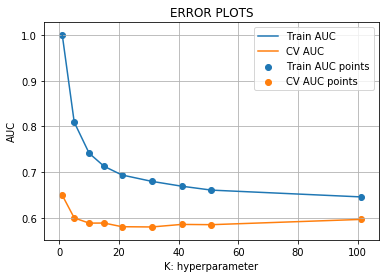

In [91]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

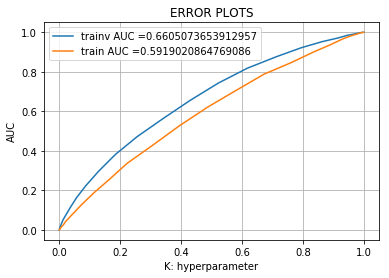

In [92]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
best_k = 51

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainv AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [95]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24949824 for threshold 0.451
[[5373 5877]
 [2880 8315]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24984488155934317 for threshold 0.471
[[4238 4032]
 [3116 5114]]


the maximum value of tpr*(1-fpr) 0.24949824 for threshold 0.451


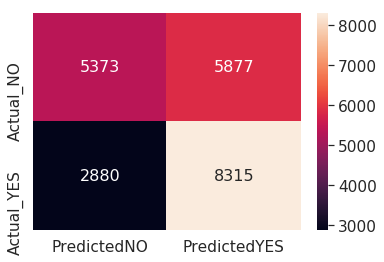

In [101]:
train_confu_matr = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
train_confu_matr.columns = ['PredictedNO','PredictedYES']
train_confu_matr = train_confu_matr.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(train_confu_matr, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.24984488155934317 for threshold 0.471


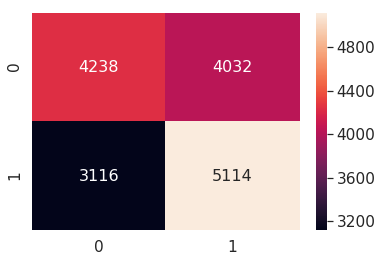

In [100]:
test_confu_matr = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
test_confu_matr.columns = ['PredictedNO','PredictedYES']
test_confu_matr = test_confu_matr.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(test_confu_matr, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [102]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_clean_ohe,X_train_title_tfidf,X_train_clean_sub_ohe,X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_clean_ohe,X_cv_title_tfidf,X_cv_clean_sub_ohe,X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_clean_ohe,X_test_title_tfidf,X_test_clean_sub_ohe,X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 52750) (22445,)
(11055, 52750) (11055,)
(16500, 52750) (16500,)


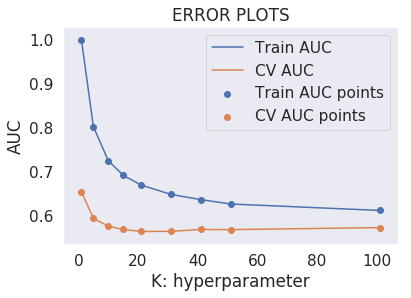

In [103]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_tfidf, y_train)

    y_train_pred = batch_predict(neigh, X_tr_tfidf)    
    y_cv_pred = batch_predict(neigh, X_cr_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

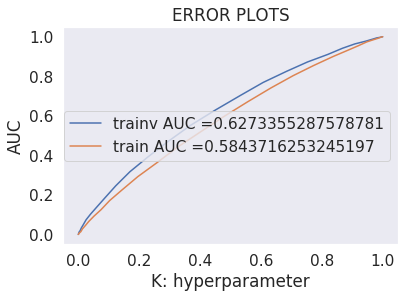

In [104]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
best_k = 51

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_tfidf)    
y_test_pred = batch_predict(neigh, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainv AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [106]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
train_confu_matr_tfidf = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
test_confu_matr_tfidf = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24892416 for threshold 0.49
[[5256 5994]
 [3322 7873]]
the maximum value of tpr*(1-fpr) 0.24892416 for threshold 0.49
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24942097790852563 for threshold 0.51
[[4334 3936]
 [3341 4889]]
the maximum value of tpr*(1-fpr) 0.24942097790852563 for threshold 0.51


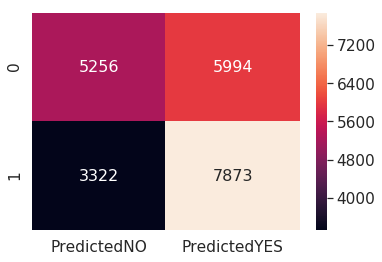

In [107]:
train_confu_matr_tfidf.columns = ['PredictedNO','PredictedYES']
train_confu_matr = train_confu_matr_tfidf.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(train_confu_matr_tfidf, annot=True,annot_kws={"size": 16}, fmt='g')

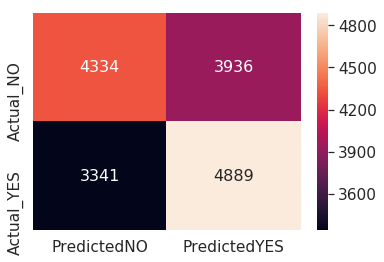

In [108]:
test_confu_matr_tfidf.columns = ['PredictedNO','PredictedYES']
test_confu_matr_tfidf = test_confu_matr_tfidf.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(test_confu_matr_tfidf, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [85]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_w2v = hstack((X_train_clean_ohe,title_avg_w2v ,X_train_clean_sub_ohe,essay_avg_w2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr_w2v = hstack((X_cv_clean_ohe,title_cv_avg_w2v  ,X_cv_clean_sub_ohe,essay_cv_avg_w2v, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te_w2v = hstack((X_test_clean_ohe,title_test_avg_w2v  ,X_test_clean_sub_ohe,essay_test_avg_w2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_w2v.shape, y_train.shape)
print(X_cr_w2v.shape, y_cv.shape)
print(X_te_w2v   .shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 199) (22445,)
(11055, 199) (11055,)
(16500, 199) (16500,)


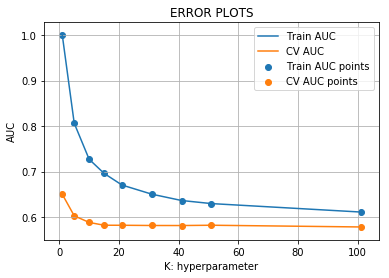

In [86]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_w2v, y_train)

    y_train_pred = batch_predict(neigh, X_tr_w2v)    
    y_cv_pred = batch_predict(neigh, X_cr_w2v)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

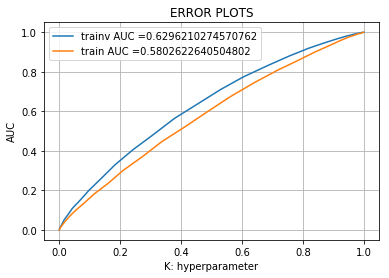

In [87]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
best_k = 51

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_w2v)    
y_test_pred = batch_predict(neigh, X_te_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainv AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [89]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [90]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
train_confu_matr_w2v = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
test_confu_matr_w2v = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24919537327771568 for threshold 0.49
[[5279 5914]
 [3277 7975]]
the maximum value of tpr*(1-fpr) 0.24919537327771568 for threshold 0.49
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24982127026795165 for threshold 0.529
[[4840 3388]
 [3967 4305]]
the maximum value of tpr*(1-fpr) 0.24982127026795165 for threshold 0.529


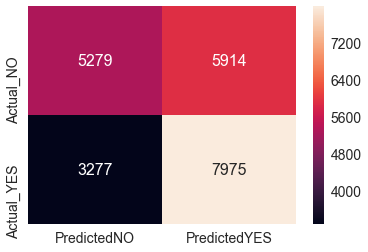

In [91]:
train_confu_matr_w2v.columns = ['PredictedNO','PredictedYES']
train_confu_matr_w2v = train_confu_matr_w2v.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(train_confu_matr_w2v, annot=True,annot_kws={"size": 16}, fmt='g')

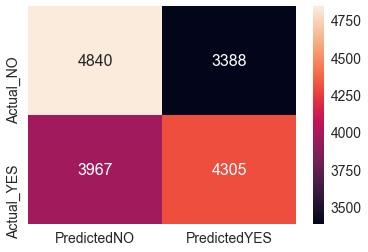

In [92]:
test_confu_matr_w2v.columns = ['PredictedNO','PredictedYES']
test_confu_matr_w2v = test_confu_matr_w2v.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(test_confu_matr_w2v, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [93]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf_w2v = hstack((X_train_clean_ohe,title_tfidf_w2v_vectors ,X_train_clean_sub_ohe,essay_train_tfidf_w2v_vectors, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr_tfidf_w2v = hstack((X_cv_clean_ohe,title_cv_tfidf_w2v_vectors ,X_cv_clean_sub_ohe,essay_cv_tfidf_w2v_vectors, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te_tfidf_w2v = hstack((X_test_clean_ohe,title_test_tfidf_w2v_vectors  ,X_test_clean_sub_ohe,essay_test_tfidf_w2v_vectors, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_cr_tfidf_w2v.shape, y_cv.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 699) (22445,)
(11055, 699) (11055,)
(16500, 699) (16500,)


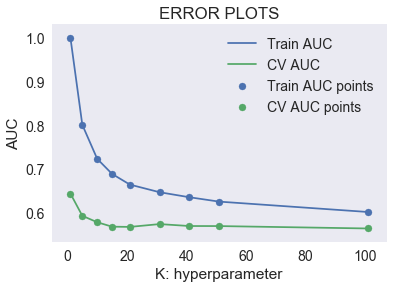

In [94]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_tfidf_w2v, y_train)

    y_train_pred = batch_predict(neigh, X_tr_tfidf_w2v)    
    y_cv_pred = batch_predict(neigh, X_cr_tfidf_w2v)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

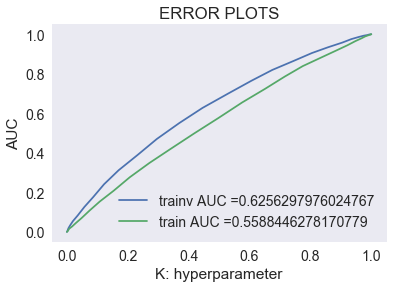

In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
best_k = 51

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr_tfidf_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_tfidf_w2v)    
y_test_pred = batch_predict(neigh, X_te_tfidf_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainv AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [96]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [97]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
train_confu_matr_tfidf_w2v = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
test_confu_matr_tfidf_w2v = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24913340170480414 for threshold 0.49
[[5267 5926]
 [3379 7873]]
the maximum value of tpr*(1-fpr) 0.24913340170480414 for threshold 0.49
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499934859659642 for threshold 0.51
[[4135 4093]
 [3508 4764]]
the maximum value of tpr*(1-fpr) 0.2499934859659642 for threshold 0.51


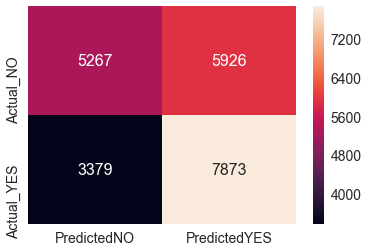

In [98]:
train_confu_matr_tfidf_w2v.columns = ['PredictedNO','PredictedYES']
train_confu_matr_tfidf_w2v = train_confu_matr_tfidf_w2v.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(train_confu_matr_tfidf_w2v, annot=True,annot_kws={"size": 16}, fmt='g')

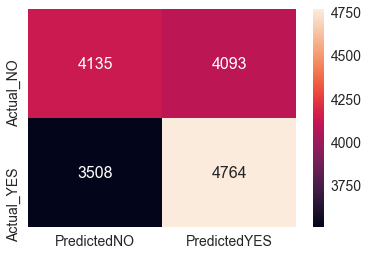

In [101]:
test_confu_matr_tfidf_w2v.columns = ['PredictedNO','PredictedYES']
test_confu_matr_tfidf_w2v = test_confu_matr_tfidf_w2v.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(test_confu_matr_tfidf_w2v, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [102]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_clean_ohe,X_train_title_tfidf,X_train_clean_sub_ohe,X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_clean_ohe,X_cv_title_tfidf,X_cv_clean_sub_ohe,X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_clean_ohe,X_test_title_tfidf,X_test_clean_sub_ohe,X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 52732) (22445,)
(11055, 52732) (11055,)
(16500, 52732) (16500,)


In [104]:
from sklearn.feature_selection import SelectKBest, chi2

X_tr_best = SelectKBest(chi2, k=2000).fit_transform(X_tr_tfidf, y_train)
X_te_best = SelectKBest(chi2, k=2000).fit_transform(X_te_tfidf, y_test)
X_cr_best = SelectKBest(chi2, k=2000).fit_transform(X_cr_tfidf, y_cv)


print("Final Data matrix")
print(X_tr_best.shape, y_train.shape)
print(X_cr_best.shape, y_cv.shape)
print(X_te_best.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 2000) (22445,)
(11055, 2000) (11055,)
(16500, 2000) (16500,)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [12:51<00:00, 64.85s/it]


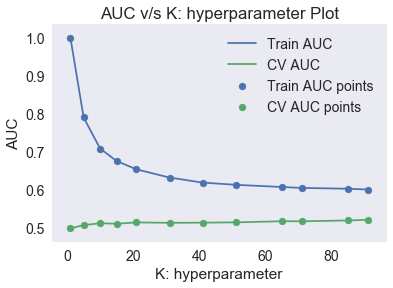

In [105]:
train_auc = []
cv_auc = []

K = [1, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_best, y_train)

    y_train_pred = batch_predict(neigh, X_tr_best)    
    y_cv_pred = batch_predict(neigh, X_cr_best)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot")
plt.grid()
plt.show()

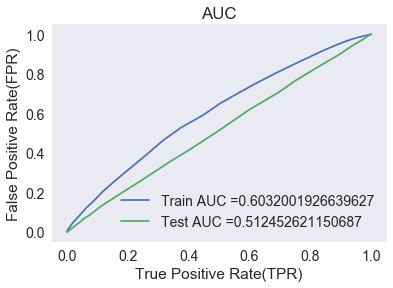

In [106]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
best_k = 75
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_tr_best, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_best)    
y_test_pred = batch_predict(neigh, X_te_best)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [107]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [108]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
train_confu_matr_best = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
test_confu_matr_best = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24998274110851004 for threshold 0.48
[[5550 5643]
 [3930 7322]]
the maximum value of tpr*(1-fpr) 0.24998274110851004 for threshold 0.48
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24983088622295685 for threshold 0.573
[[7889  339]
 [7879  393]]
the maximum value of tpr*(1-fpr) 0.24983088622295685 for threshold 0.573


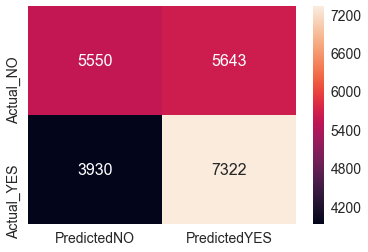

In [109]:
train_confu_matr_best.columns = ['PredictedNO','PredictedYES']
train_confu_matr_best = train_confu_matr_best.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(train_confu_matr_best, annot=True,annot_kws={"size": 16}, fmt='g')

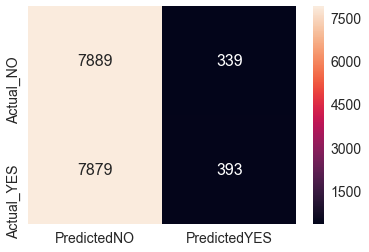

In [111]:

test_confu_matr_best.columns = ['PredictedNO','PredictedYES']
test_confu_matr_best = test_confu_matr_best.rename({0: 'Actual_NO',1: 'Actual_YES'})
sns.set(font_scale=1.4)#for size of the labels
sns.heatmap(test_confu_matr_best, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusions</h1>

In [0]:
# Please compare all your models using Prettytable library

In [112]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper_Parameter", "AUC"]

x.add_row(["Bow", "Brute_force", 51, 0.63])
x.add_row(["tfidf", "Brute_force", 51, 0.57])
x.add_row(["avg_w2v", "Brute_force", 51, 0.58])
x.add_row(["tfidf_w2v", "Brute_force", 51, 0.55])
x.add_row(["tfidf", "Top_2000", 75, 0.51])

print(x)

+------------+-------------+-----------------+------+
| Vectorizer |    Model    | Hyper_Parameter | AUC  |
+------------+-------------+-----------------+------+
|    Bow     | Brute_force |        51       | 0.63 |
|   tfidf    | Brute_force |        51       | 0.57 |
|  avg_w2v   | Brute_force |        51       | 0.58 |
| tfidf_w2v  | Brute_force |        51       | 0.55 |
|   tfidf    |   Top_2000  |        75       | 0.51 |
+------------+-------------+-----------------+------+
